In [34]:
import pathlib

import pandas as pd

from dataset import Dataset, Entry

## Loading and preparing data

In [35]:
df = Dataset(csv_file_path=pathlib.Path('other', 'daylio-data', 'data_2023_12_02.csv'), remove=True)

Dataset(435 entries)


In [36]:
ACTIVITIES = list(df.activities().keys())

In [62]:
def entry_to_list(entry: Entry, with_mood: bool = True) -> list:
    return [act in entry.activities for act in ACTIVITIES] + ([entry.mood] if with_mood else [])

In [63]:
from typing import Iterable
def pd_dataframe_from_entries(entries: Iterable[Entry]) -> pd.DataFrame:
    return pd.DataFrame([entry_to_list(entry) for entry in entries], columns=ACTIVITIES + ['mood'])

In [39]:
new_df = pd_dataframe_from_entries(df.entries)

In [42]:
new_df

,Martina,friends,home,movies & series,amused,coding,Leha,excited,unsure,satisfied,...,cleaning,did something,cinema,overheated,laundry,photography,snacking,meeting,helping,mood
0,True,True,True,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0.294848
1,False,False,True,False,False,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,-0.516917
2,False,False,True,False,False,True,False,True,True,True,...,False,False,False,False,False,False,False,False,False,-0.516917
3,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,-0.516917
4,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,-1.328682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,True,True,True,True,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,-1.328682
431,False,True,True,False,False,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,0.294848
432,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1.918377
433,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0.294848


In [41]:
# standardize the mood column
mean = new_df['mood'].mean()
std = new_df['mood'].std()
new_df['mood'] = (new_df['mood'] - mean) / std

## Learning

In [84]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [46]:
df_input = new_df[ACTIVITIES]
df_labels = new_df['mood']

In [81]:
X_train, X_test, y_train, y_test = train_test_split(df_input, df_labels, test_size=0.2)

In [86]:
model = MLPRegressor(
    hidden_layer_sizes=(100,), 
    activation='relu', 
    max_iter=2000,
    solver='adam', 
    verbose=True
)
model.fit(X_train, y_train)

Iteration 1, loss = 0.54833178
Iteration 2, loss = 0.51980210
Iteration 3, loss = 0.49403835
Iteration 4, loss = 0.46963798
Iteration 5, loss = 0.44771864
Iteration 6, loss = 0.42673763
Iteration 7, loss = 0.40746667
Iteration 8, loss = 0.38933273
Iteration 9, loss = 0.37175089
Iteration 10, loss = 0.35559347
Iteration 11, loss = 0.34069111
Iteration 12, loss = 0.32597905
Iteration 13, loss = 0.31239552
Iteration 14, loss = 0.30043377
Iteration 15, loss = 0.28888833
Iteration 16, loss = 0.27785541
Iteration 17, loss = 0.26758423
Iteration 18, loss = 0.25863482
Iteration 19, loss = 0.25004119
Iteration 20, loss = 0.24276630
Iteration 21, loss = 0.23546013
Iteration 22, loss = 0.22882315
Iteration 23, loss = 0.22274922
Iteration 24, loss = 0.21705303
Iteration 25, loss = 0.21267742
Iteration 26, loss = 0.20764839
Iteration 27, loss = 0.20356720
Iteration 28, loss = 0.19918789
Iteration 29, loss = 0.19537860
Iteration 30, loss = 0.19206101
Iteration 31, loss = 0.18829232
Iteration 32, los

MLPRegressor(max_iter=2000, verbose=True)

In [88]:
model.score(X_test, y_test)

0.28301646290781357

## Testing

### On the test dataset

In [110]:
test_inputs = X_test
test_labels = list(y_test * std + mean)

In [111]:
predictions = model.predict(test_inputs) * std + mean

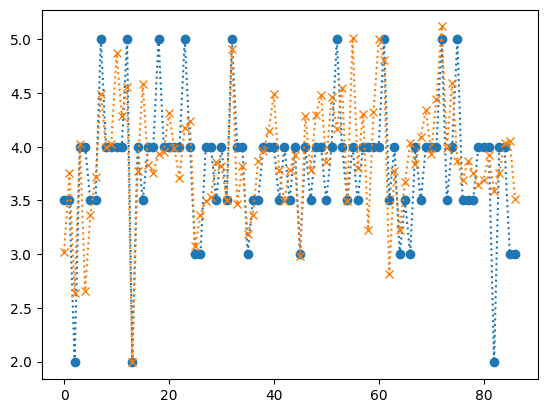

In [113]:
import matplotlib.pyplot as plt
plt.plot(test_labels, 'o:')
plt.plot(predictions, 'x:')

### On new entries

In [ ]:
def preduct_mood(entry: Entry, model) -> float:
    df_one_entry = pd_dataframe_from_entries([entry]).drop(columns=['mood'])
    return model.predict(df_one_entry)[0] * std + mean

In [116]:
ent = df.entries[48]
print(f'mood_predicted={preduct_mood(ent, model)}; mood_actual={ent.mood}')

mood_predicted=3.498803639469126; mood_actual=3.5
